In [1]:
import numpy as np
import pandas as pd

df_bank = pd.read_csv('./dataset/BankCustomer.csv')
df_bank.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


/var/folders/bs/c1rv5w6n0cn77fp62sj3hzhh0000gp/T/ipykernel_1044/4024042315.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i + 1)


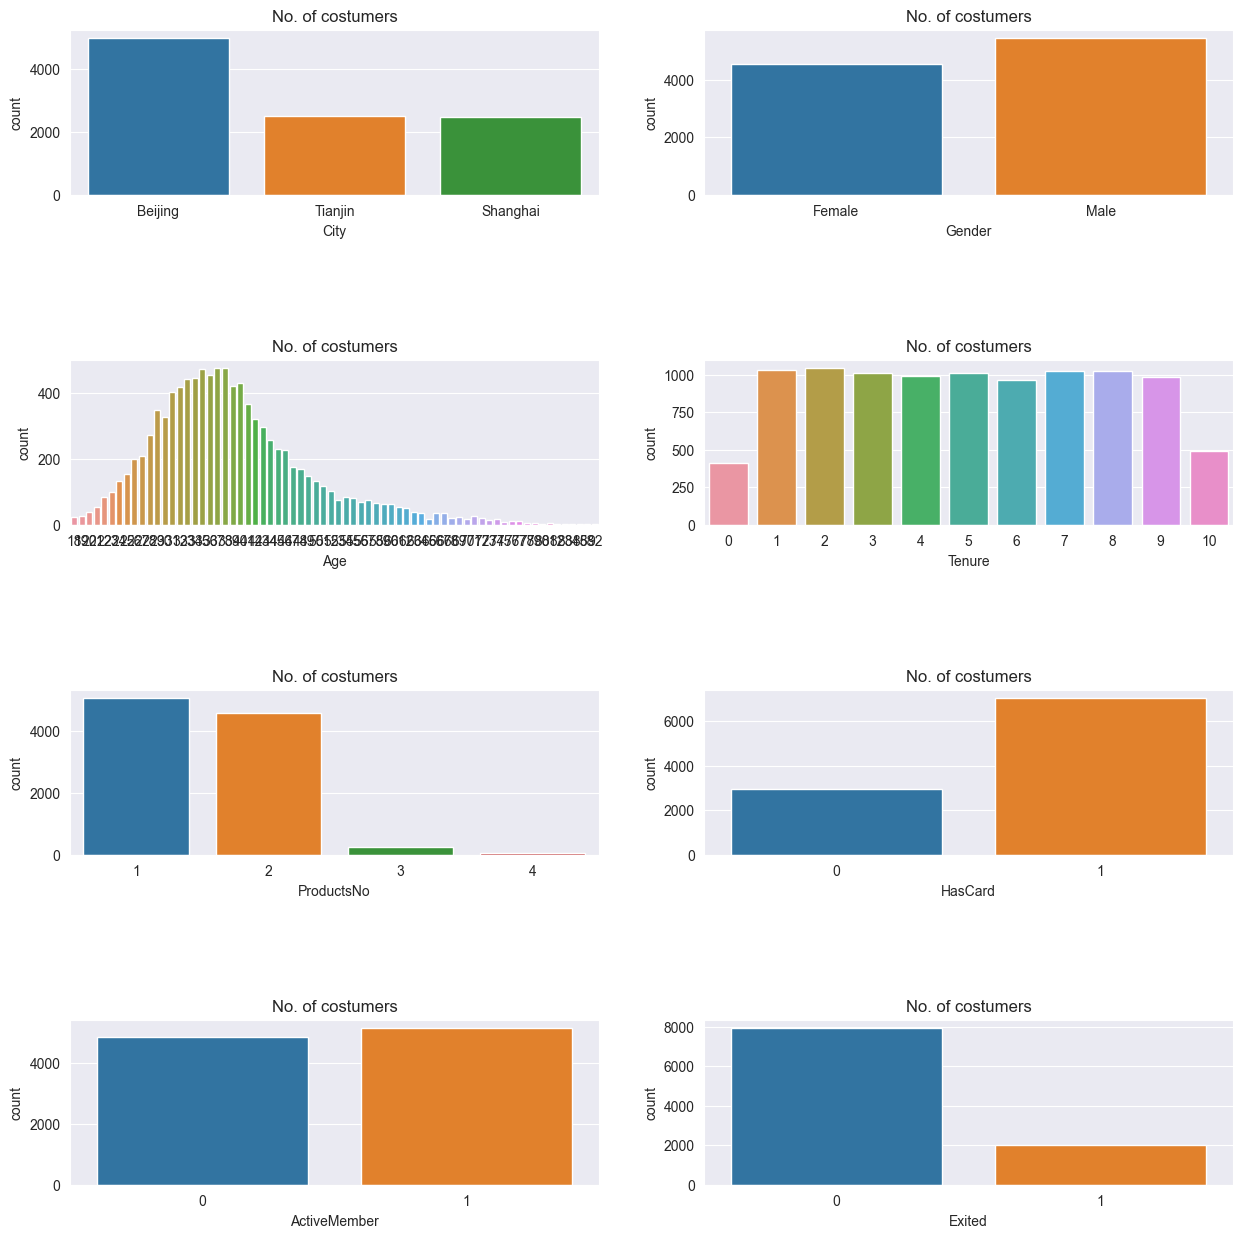

In [2]:
# 显示数据的分布情况：
import matplotlib.pyplot as plt
import seaborn as sns

features = ['City', 'Gender', 'Age', 'Tenure',
            'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig = plt.subplots(figsize=(15, 15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i + 1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=df_bank)
    plt.title("No. of costumers")

In [3]:
# 数据清理：
# 把二元类别文本数字化
df_bank['Gender'].replace("Female", 0, inplace=True)
df_bank['Gender'].replace("Male", 1, inplace=True)
# 显示数字类别
print("Gender unique values", df_bank['Gender'].unique())

# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
d_city = pd.get_dummies(df_bank['City'], prefix="City")
df_bank = [df_bank, d_city]
df_bank = pd.concat(df_bank, axis=1)

# 构建特征和标签集合
y = df_bank['Exited']
X = df_bank.drop(['Name', 'Exited', 'City'], axis=1)
X.head()

Gender unique values [0 1]


,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,True,False,False
1,1,69,6,2,0,1,682,28605.00,0.0000,True,False,False
2,0,32,9,1,1,1,803,10378.09,236311.0932,True,False,False
3,0,37,0,2,1,1,778,25564.01,129909.8079,False,False,True
4,1,55,4,3,1,0,547,3235.61,136976.1948,False,False,True


In [4]:
# 用标准方法拆分数据集为测试集和训练集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
history = lr.fit(X_train, y_train)
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test, y_test) * 100))

逻辑回归测试集准确率 78.35%


In [6]:
# 1. 用序贯模型构建网络
import keras
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(units=12, input_dim=12, activation='relu'))  # 添加输入层
ann.add(Dense(units=24, activation='relu'))  # 添加隐层
ann.add(Dense(units=1, activation='sigmoid'))  # 添加输出层
ann.summary()

2023-06-24 19:53:38.031698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


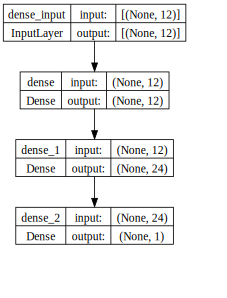

In [7]:
# 展示出神经网络的形状结构：
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# macOS Catalina 10.15.7安装graphviz库：https://www.cnblogs.com/cag2050/p/17500956.html
SVG(model_to_dot(ann, show_shapes=True, dpi=60).create(prog='dot', format='svg'))

In [8]:
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer='adam',  # 优化器
            loss='binary_crossentropy',  # 损失函数
            metrics=['acc'])  # 评估指标

In [11]:
# 编译神经网络，指定优化器，损失函数，以及评估标准
history = ann.fit(X_train, y_train,  # 指定训练集
                  epochs=30,  # 指定训练轮次
                  batch_size=64) # 指定数据批量
                  # validation_data=(X_test, y_test))  # 指定验证集,这里为了简化模型，直接用测试集数据进行验证

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).